# implement a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset.

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.callbacks import EarlyStopping
from tensorflow import constant
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# Solve SSL Certificate problem
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# training data: 50000 images that are 32x32 pixels and RGB
assert x_train.shape == (50000, 32, 32, 3)

# testing data: 10000 images that are 32x32 pixels and RGB
assert x_test.shape == (10000, 32, 32, 3)

# Training labels of integers 0-9 for 50000 samples
assert y_train.shape == (50000, 1)

# Testing labels of integers 0-9 for 50000 samples
assert y_test.shape == (10000, 1)


# simple deep net with the following structure:

# Input layer: Specify the appropriate shape (according to CIFAR-10 image shape)
# Convolutional layer: 7x7 kernel, 64 output channels, ReLU activation
# Max pooling layer: 2x2 pool size, stride 2
# Convolutional layer: 3x3 kernel, 128 output channels, ReLU activation
# Max pooling layer: 2x2 pool size, stride 2
# Convolutional layer: 3x3 kernel, 256 output channels, ReLU activation
# Max pooling layer: 2x2 pool size, stride 2
# Flatten the output
# Dropout layer (0.5 probability)
# Dense layer with softmax activation

# Using docs from https://keras.io/guides/sequential_model/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer


In [4]:
model = Sequential()
model.add(InputLayer(input_shape=(32,32,3)))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0

In [5]:
# https://keras.io/api/callbacks/early_stopping/
callback = EarlyStopping(monitor='loss', patience=3)

# https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
# Using the categorical crossentropy loss function because it is appropriate for
# our classification problem with multiple classes, and it provides one_hot representation
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Must one_hot the training data

y_train_one_hot = to_categorical(y_train, 10)
y_train_one_hot = constant(y_train_one_hot, shape=[50000, 10])

# Train the model on the training data, using the last 20% of the data for validation.

history = model.fit(x_train, y_train_one_hot, batch_size=256,
                    epochs=17, validation_split=0.2)

Epoch 1/17
157/157 [==============================] - 50s 308ms/step - loss: 2.6464 - accuracy: 0.2596 - val_loss: 1.7510 - val_accuracy: 0.3720
Epoch 2/17
157/157 [==============================] - 55s 352ms/step - loss: 1.7368 - accuracy: 0.3752 - val_loss: 1.6433 - val_accuracy: 0.4015
Epoch 3/17
157/157 [==============================] - 55s 349ms/step - loss: 1.6230 - accuracy: 0.4186 - val_loss: 1.5668 - val_accuracy: 0.4355
Epoch 4/17
157/157 [==============================] - 54s 347ms/step - loss: 1.5304 - accuracy: 0.4567 - val_loss: 1.4431 - val_accuracy: 0.4857
Epoch 5/17
157/157 [==============================] - 49s 309ms/step - loss: 1.4649 - accuracy: 0.4811 - val_loss: 1.4489 - val_accuracy: 0.4829
Epoch 6/17
157/157 [==============================] - 52s 334ms/step - loss: 1.4460 - accuracy: 0.4886 - val_loss: 1.4771 - val_accuracy: 0.4814
Epoch 7/17
157/157 [==============================] - 49s 315ms/step - loss: 1.3667 - accuracy: 0.5173 - val_loss: 1.4025 - val_ac

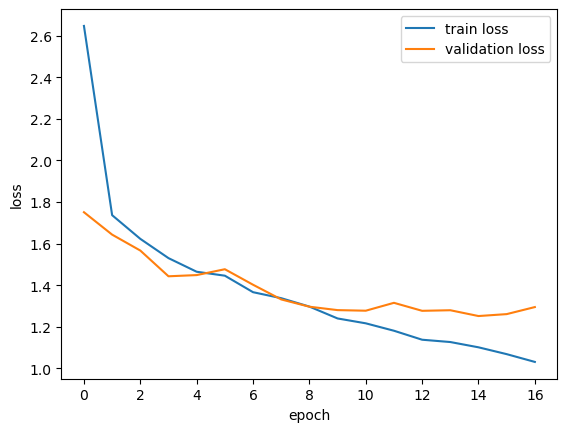

In [6]:
# To visualize the loss and validation loss
# durring the fitting of the model, we plot
# per epoch

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [7]:
# Evaluate model performance

y_test_one_hot = to_categorical(y_test, 10)
y_test_one_hot = constant(y_test_one_hot, shape=[10000, 10])


train_loss, train_accuracy = model.evaluate(x_train, y_train_one_hot)
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.2905 - accuracy: 0.5680
Training Accuracy:  0.6805800199508667
Test Accuracy:  0.5680000185966492


In [ ]:
# Finally, compute the confusion matrix
# Each row and column represents a class, so for the 10 classes,
# the matrix is 10 x 10.  Each row is the actual class of
# the image, and the columns are the predicted class.
# The diagonal of the matrix is all the correctly classified
# images


# Get the predictions from the model.
pred = model.predict(x_test)

# Get the max (class predicted) in each row.
y_pred = np.argmax(pred, axis=1)

# 10 x 10 confusion matrix for 10 classes.
confusion_matrix = np.zeros((10,10))


for i in range(len(y_pred)):
  true = y_test[i]
  pred = y_pred[i]
  confusion_matrix[true, pred] += 1

print(confusion_matrix)